# 911 Project

For this project we will be analyzing some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:
* lat : Latitude
* lng: Longitude
* desc: Description of the Emergency Call
* zip: Zipcode
* title: Title
* timeStamp: YYYY-MM-DD HH:MM:SS
* twp: Township
* addr: Address
* e:Dummy variable (always 1)

In [192]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Data Exploring 

In [193]:
df = pd.read_csv('911.csv')

In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [195]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [196]:
df['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

In [197]:
df['twp'].value_counts().head()

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

In [198]:
df['title'].nunique()

110

#### Creating New Features  =>  ' reason '

In [199]:
df['reason'] = df['title'].apply(lambda x : x.split(':')[0])

In [200]:
df['reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: reason, dtype: int64

<AxesSubplot:xlabel='reason', ylabel='count'>

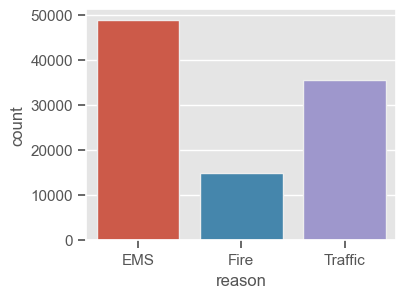

In [201]:
plt.figure(figsize=(4,3))
plt.style.use('ggplot')
sns.set_context('notebook',font_scale=1)
sns.countplot(x='reason',data=df)

#### convert 'timeStamp' column from str to DateTime objects

In [202]:
type(df['timeStamp'][0])

str

In [203]:
df['timeStamp']=pd.to_datetime(df['timeStamp'])

In [204]:
type(df['timeStamp'][0])

pandas._libs.tslibs.timestamps.Timestamp

#### Creat 3 new columns 'hour','month' and 'dayOfTheWeek'

In [205]:
df['hour'] = df['timeStamp'].apply(lambda x : x.hour )
df['month'] = df['timeStamp'].apply(lambda x : x.month )
df['dayOfTheWeek'] = df['timeStamp'].apply(lambda x : x.day_of_week )

In [206]:
df['dayOfTheWeek'].unique()

array([3, 4, 5, 6, 0, 1, 2])

______
use a map to convert numbers to day of the week

In [207]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [208]:
df['dayOfTheWeek'] = df['dayOfTheWeek'].map(dmap)

<AxesSubplot:xlabel='dayOfTheWeek', ylabel='count'>

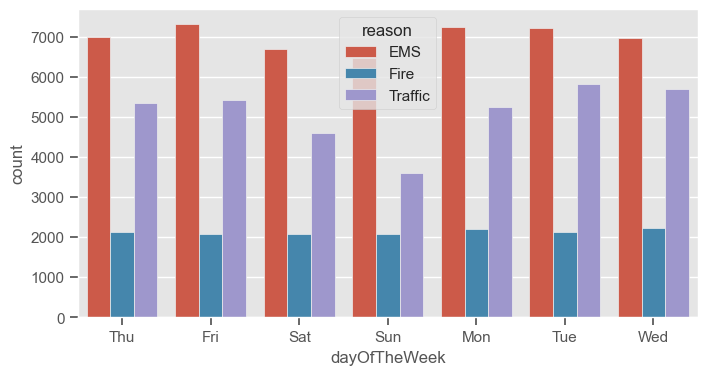

In [209]:
fig = plt.figure(figsize=(8,4))
plt.style.use('ggplot')
sns.countplot(x='dayOfTheWeek',data=df, hue='reason')

<AxesSubplot:xlabel='month', ylabel='count'>

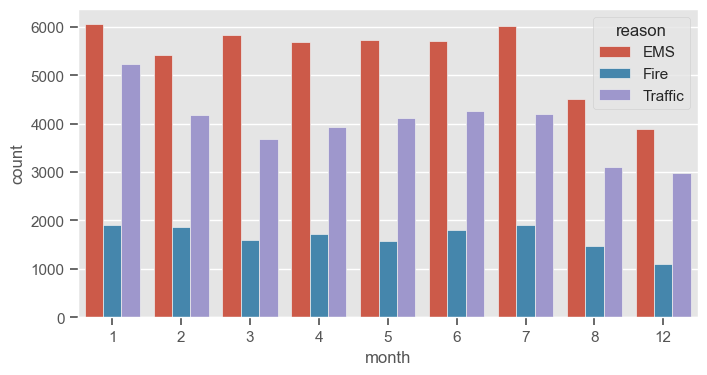

In [210]:
fig = plt.figure(figsize=(8,4))
plt.style.use('ggplot')
sns.countplot(x='month',data=df, hue='reason')

##### we don't have information which is related to Sep, Oct and Nov!

In [211]:
byMonth = df.groupby('month').count()
byMonth

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,dayOfTheWeek
month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423
6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786
7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137
8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078
12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969


<AxesSubplot:xlabel='month'>

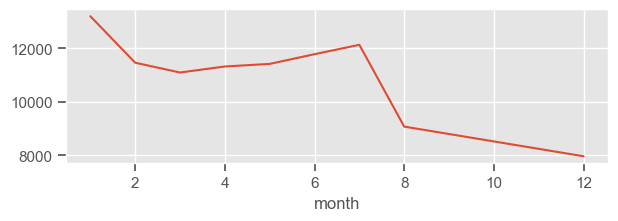

In [212]:
plt.figure(figsize=(7,2))
plt.style.use('ggplot')
byMonth['reason'].plot()

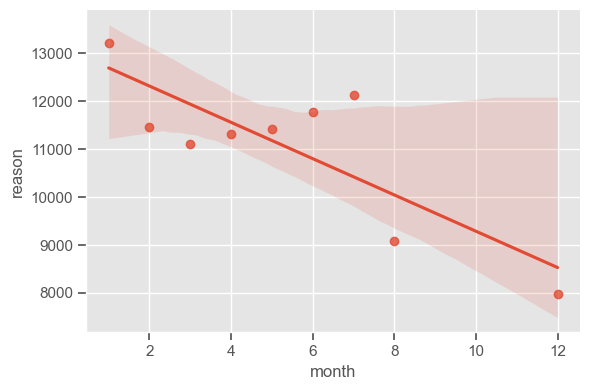

In [213]:
sns.lmplot(x='month', y='reason', data=byMonth.reset_index(), aspect=1.5,height=4)

In [214]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,month,dayOfTheWeek
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu


##### creat a date column

In [215]:
df['date'] = df['timeStamp'].apply(lambda x : x.date())

<AxesSubplot:xlabel='date'>

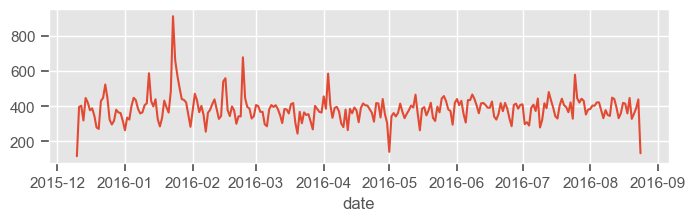

In [216]:
plt.figure(figsize=(8,2))
plt.style.use('ggplot')
df.groupby('date').count()['reason'].plot()

<AxesSubplot:title={'center':'Traffic'}, xlabel='date'>

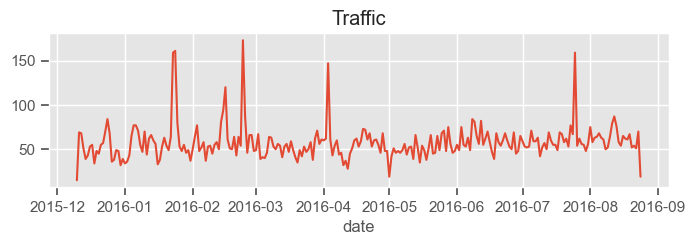

In [276]:
plt.figure(figsize=(8,2))
plt.title('Traffic')
df[df['reason']=='Fire'].groupby('date').count()['reason'].plot()

<AxesSubplot:title={'center':'EMS'}, xlabel='date'>

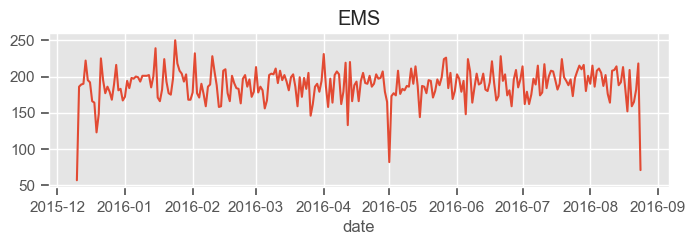

In [275]:
plt.figure(figsize=(8,2))
plt.title('EMS')
df[df['reason']=='EMS'].groupby('date').count()['reason'].plot()

<AxesSubplot:title={'center':'Fire'}, xlabel='date'>

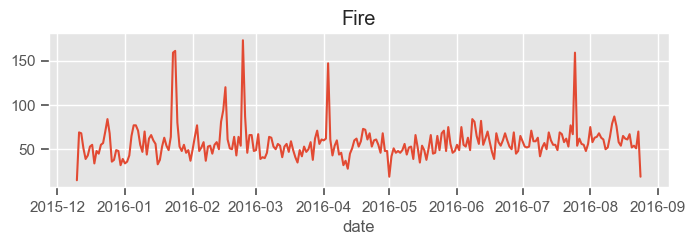

In [274]:
plt.figure(figsize=(8,2))
plt.title('Fire')
df[df['reason']=='Fire'].groupby('date').count()['reason'].plot()

##### Create heatmap and cluster by 'hour' and 'dayOfTheWeek' columns

In [254]:
dfByHoursDays = df.groupby(by=['dayOfTheWeek','hour']).count()

In [259]:
hourDay=dfByHoursDays.pivot_table(index='dayOfTheWeek',columns='hour',values='reason')
hourDay.head()

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
dayOfTheWeek,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


<AxesSubplot:xlabel='hour', ylabel='dayOfTheWeek'>

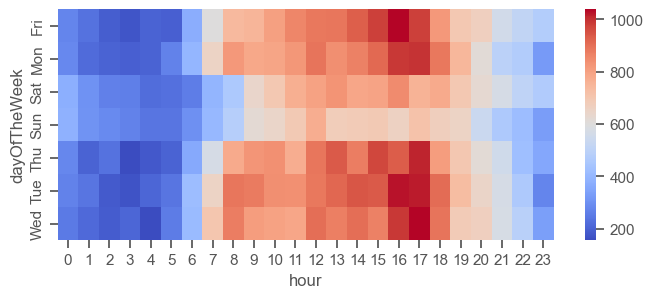

In [273]:
plt.figure(figsize=(8,3))
sns.heatmap(data=hourDay,cmap='coolwarm')

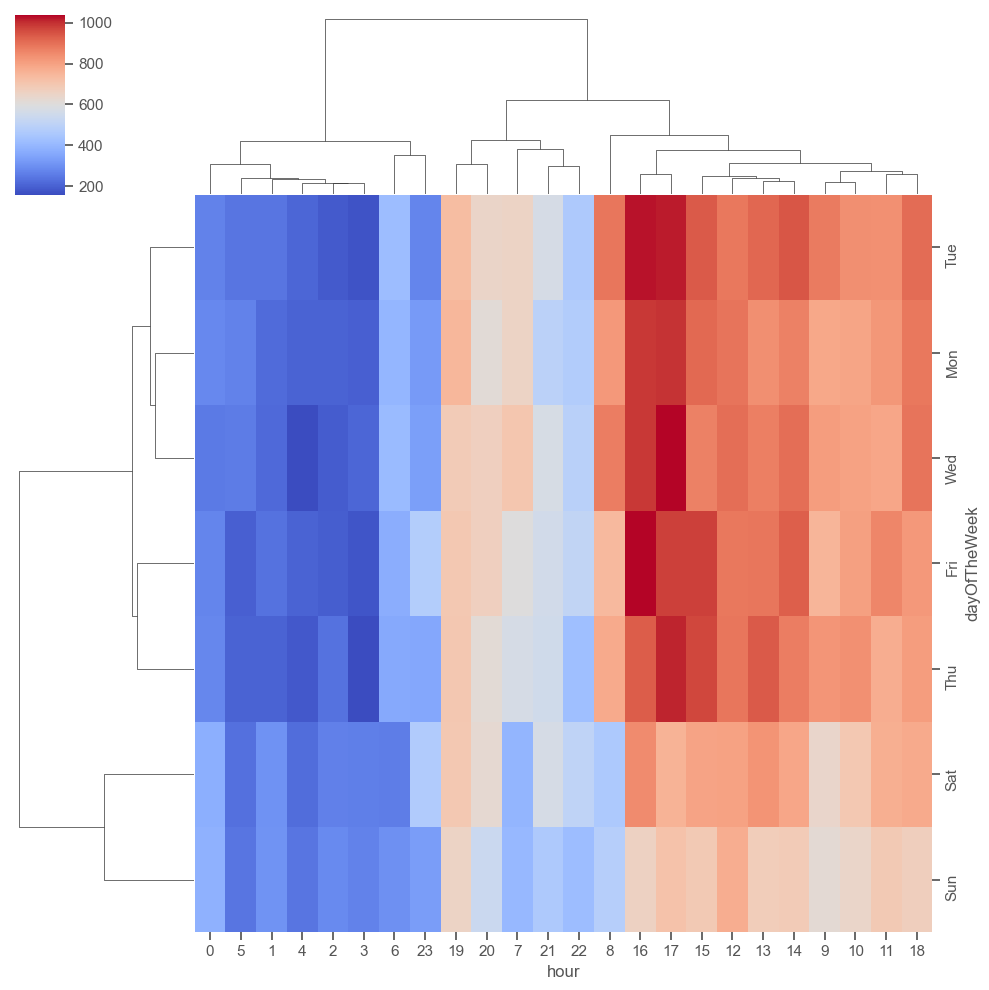

In [272]:
sns.clustermap(data=hourDay,cmap='coolwarm')

##### Create heatmap and cluster by 'month' and 'dayOfTheWeek' columns

In [283]:
monthDay = df.groupby(by=['month','dayOfTheWeek']).count().pivot_table(index='dayOfTheWeek' , 
... columns='month', values='reason')

<AxesSubplot:xlabel='month', ylabel='dayOfTheWeek'>

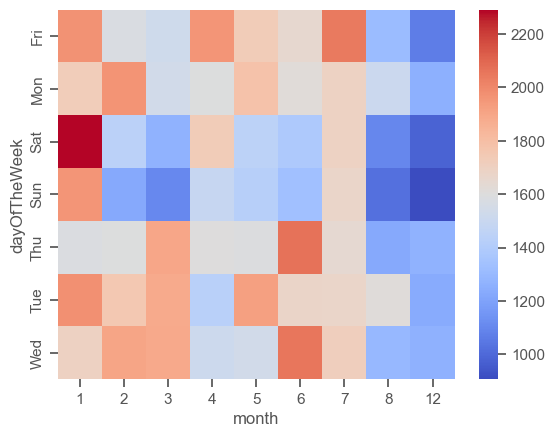

In [286]:
sns.heatmap(data=monthDay ,cmap='coolwarm')

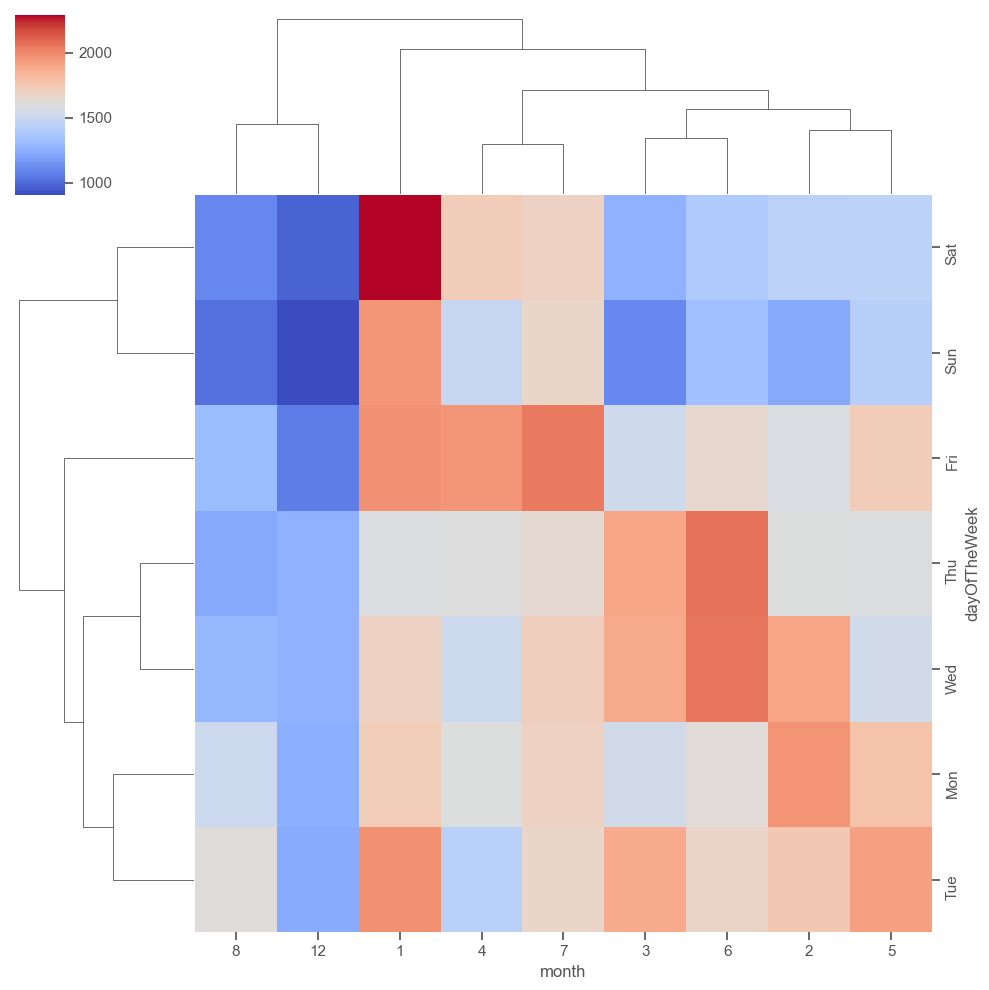

In [287]:
sns.clustermap(data=monthDay,cmap='coolwarm')